In [2]:
import matplotlib.pyplot as plt

import numpy as np

from math import factorial

In [3]:
def f(x):
    return np.sin(x)

In [4]:
def derivative_of_sin(n, a):
    # Calculate the nth derivative of sin at point a
    if n % 4 == 0:
        return np.sin(a)
    elif n % 4 == 1:
        return np.cos(a)
    elif n % 4 == 2:
        return -np.sin(a)
    else: # n % 4 == 3
        return -np.cos(a)

In [5]:
def f_approx(x, order=1, center=0):
    sin_approx = 0
    for n in range(order):
        # Using the nth derivative of sin at center to calculate the coefficient
        coeff = derivative_of_sin(n, center) / factorial(n)
        sin_approx += coeff * ((x - center) ** n)
    return sin_approx

In [6]:
# N0 = 1_000

# xbin = np.linspace(-1, 2, N0)
# y0 = f(xbin)
# center = -np.pi
# ya = f_approx1(-xbin, order = 4, center = center)
# skip = 15
# fig, ax = plt.subplots(figsize=(20,10))

# ax.plot(xbin, y0, c='b', lw = 1, alpha=0.25)
# ax.plot(xbin, ya, c='r', lw = 1, alpha=0.25)

# N = 50
# spacing = 1 / N
# offset = spacing * (skip - 1)
# print(spacing, offset)
# # x = np.linspace(0 - offset, 1 + offset, N + 2*(skip - 1))
# x = np.linspace(0, 1, N)

# y = f(x)
# for i in range(len(x) - skip):
#     j = i+skip
#     start_point = [x[i], y[i]]
#     end_point = [x[j], y[j]]
#     points = np.array([start_point, end_point])
#     # print(points)
#     c = [i/(len(x) - skip)]*3
#     ax.plot(points[:,0], points[:,1], c='k')
#     # break

# for i in range(skip):
#     sp, sp1 = [0,0], [1,0]
#     ep, ep1 = [x[i], y[i]], [x[i*-1-1], y[i*-1-1]]
#     p, p1 = np.array([sp, ep]), np.array([sp1, ep1])
#     # t = np.vstack(p,p1)
#     ax.plot(p[:,0], p[:,1], c='k')
#     ax.plot(p1[:,0], p1[:,1], c='k')

# ax.set_ylim(-2, 2)
# ax.set_xlim(-2, 2)
# plt.show()

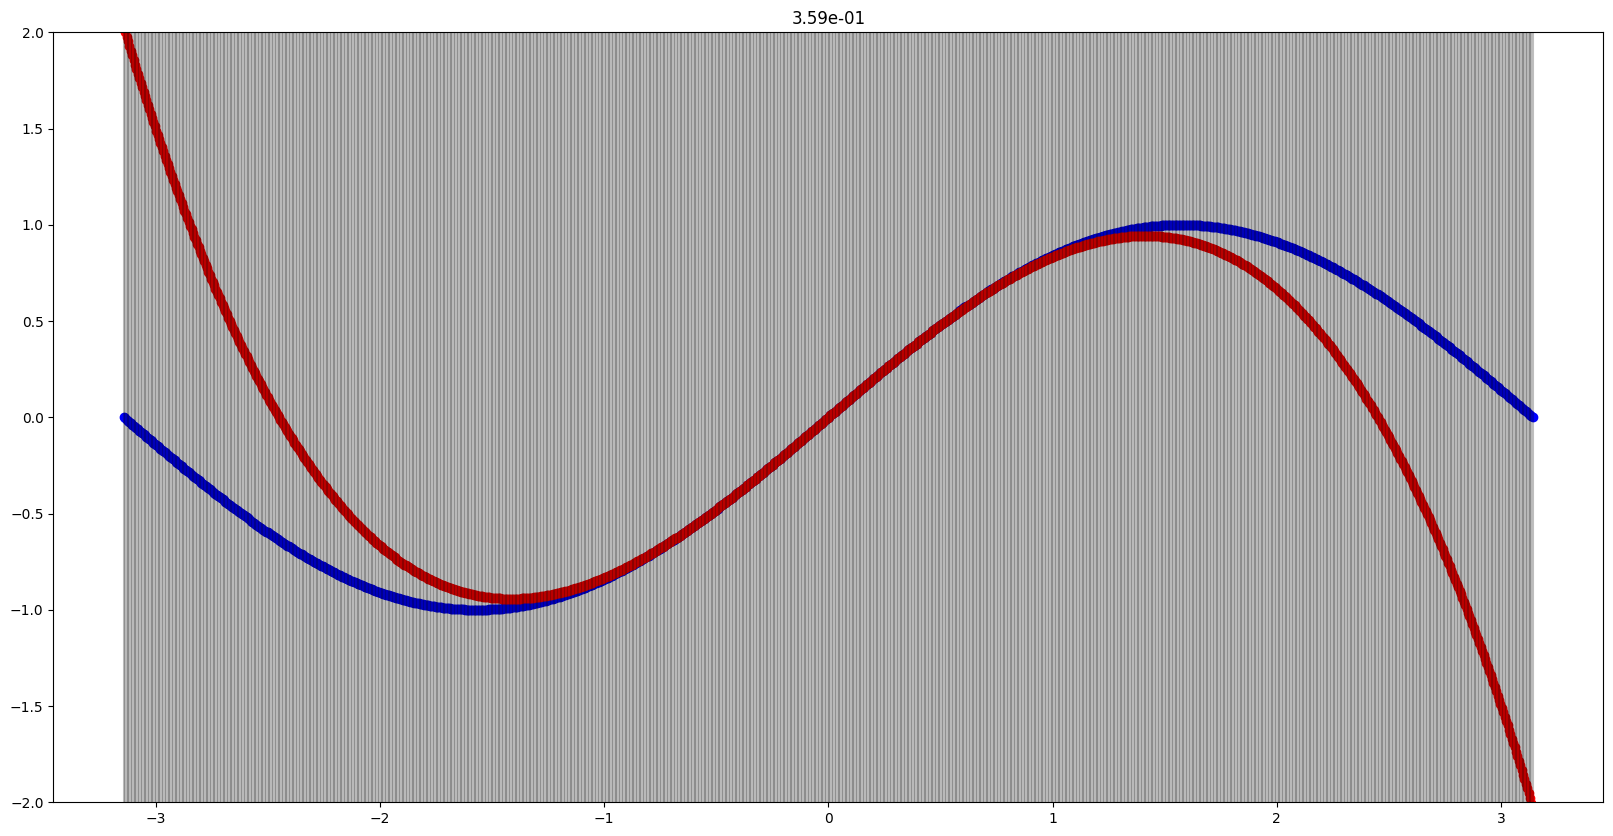

In [7]:
# Define x0 in the range [0, 2π]
resolution = 1000
x0 = np.linspace(-np.pi, np.pi, resolution)
y0 = f(x0)  # Actual function values
# center = np.pi / 2  # Center at π/2
center = 0
ya = f_approx(x0, order=4, center=center)  # Approximated values, with a higher order for better accuracy

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot((x0, x0), ([-5], [5]), c = 'k', alpha = 0.25)
ax.scatter(x0, y0, c = 'b')
ax.scatter(x0, ya, c = 'r', label='Taylor Approximation')
ax.set_ylim(-2, 2)
# ax.legend()
plt.title(f"{np.abs(y0 - ya).mean():2.2e}")
plt.show()

In [8]:
def get_distance_product(y_actual, y_approx):
    return np.abs(y_actual - y_approx).mean()

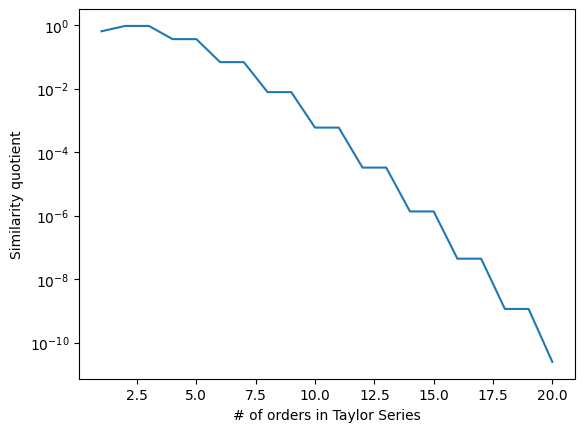

In [9]:
amount_of_orders = 20
x_axis = list(range(1, amount_of_orders + 1))
y_axis = []
y_act = f(x0)
for order in x_axis:
    y_app = f_approx(x0, order = order)
    y_axis.append(get_distance_product(y_act, y_app))
    # print(get_distance_product(y_act, y_app))
plt.xlabel("# of orders in Taylor Series")
plt.ylabel("Similarity quotient")
plt.plot(x_axis, y_axis)
plt.yscale("log")
# plt.xscale("log")
plt.show()

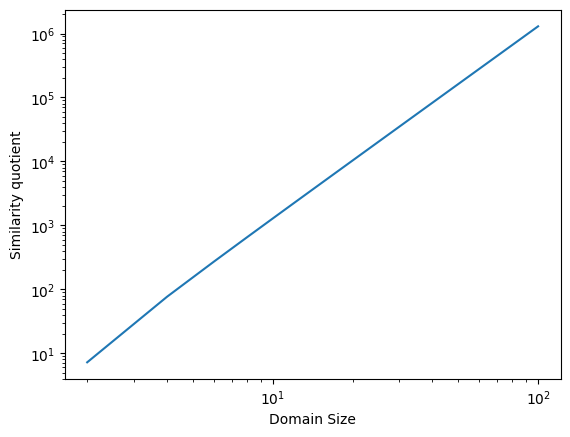

In [10]:
# Equal number of samples per unit of domain
domain_sizes = np.linspace(2, 100, 50)
y_axis = []
# np.linspace(-dom * np.pi, dom * np.pi, resolution)
# domain_sizes
for dom in domain_sizes:
    # _n = int(20 * dom)
    _n = 1_000
    _x = np.linspace(-dom * np.pi, dom * np.pi, _n)
    y_app = f_approx(_x, order = 4)
    y_act = f(_x)
    # print(get_distance_product(y_act, y_app))
    y_axis.append(get_distance_product(y_act, y_app))
plt.xlabel("Domain Size")
plt.ylabel("Similarity quotient")
plt.plot(domain_sizes, y_axis)
plt.yscale("log")
plt.xscale("log")
plt.show()
    

In [11]:
np.sqrt(np.power(y0 - ya, 2)).mean()

0.35942308546374147

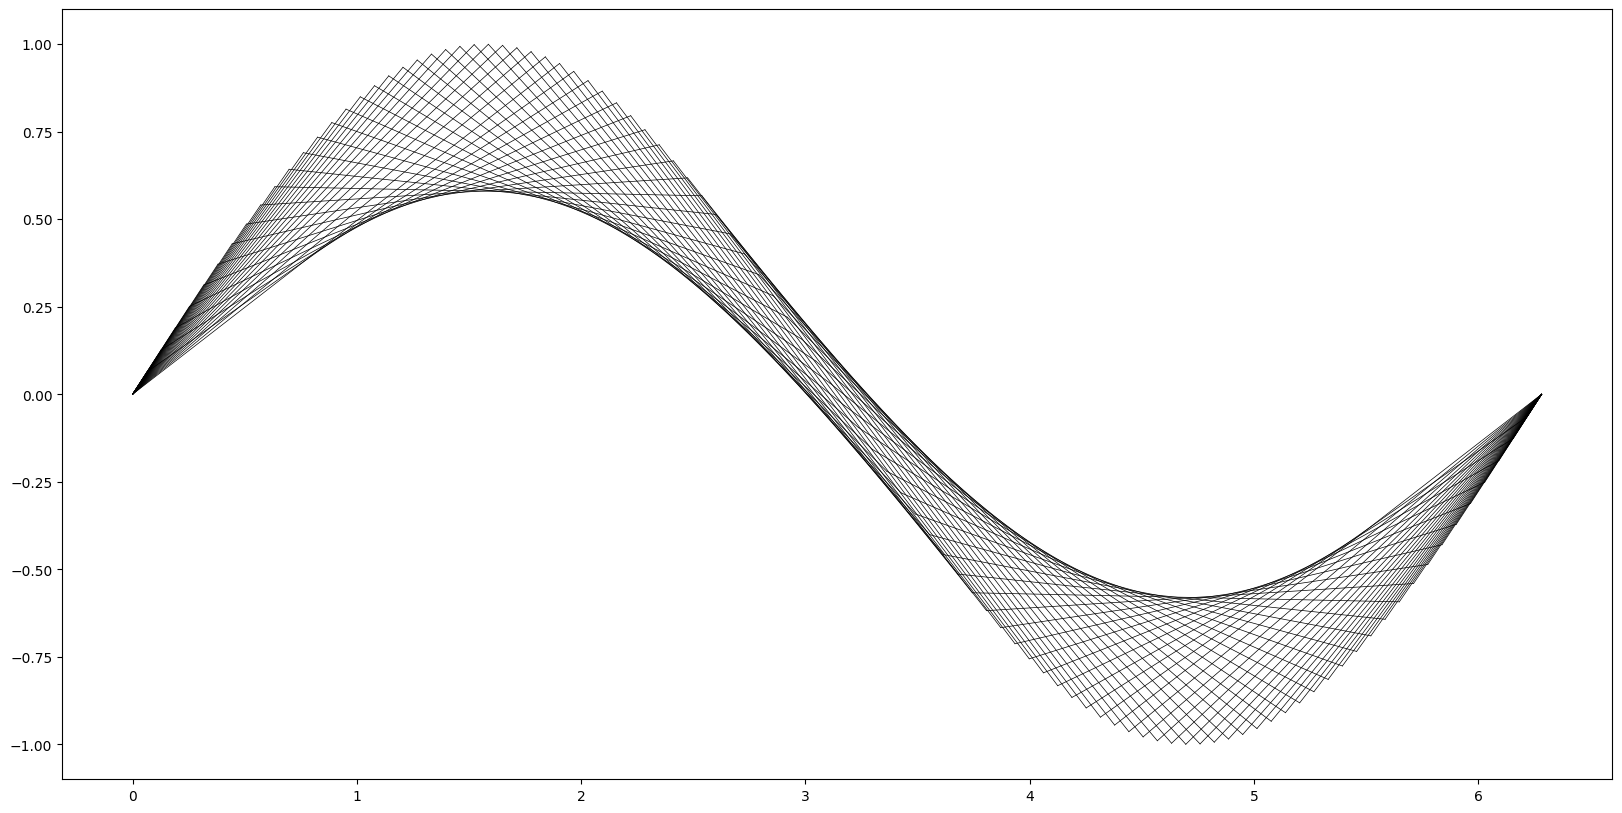

In [12]:
dots = 100
xs = np.linspace(0, 2*np.pi, dots)
ys = f(xs)
skip = 30
fig, ax = plt.subplots(figsize = (20, 10))
for i in range(dots - skip):
    start, end = xs[i], xs[i+skip]
    ax.plot([start, end], [f(start), f(end)], c = 'k', lw = 0.5)
for i in range(skip):
    sp, sp1 = [0, 0], [2 * np.pi, 0]
    ep, ep1 = [xs[i], ys[i]], [xs[-i - 1], ys[-i - 1]]
    p, p1 = np.array([sp, ep]), np.array([sp1, ep1])
    ax.plot(p[:,0], p[:,1], c='k', lw = 0.5)
    ax.plot(p1[:,0], p1[:,1], c='k', lw = 0.5)
# ax.plot(xs, ys, c = 'r')
plt.show()

In [30]:
radius = 1
res = 108
hop = 180
theta = np.linspace(0, 2*np.pi, res, endpoint=False) 
# domain = np.linspace(-radius, radius, res)
x = radius * np.cos(theta)
y = radius * np.sin(theta)

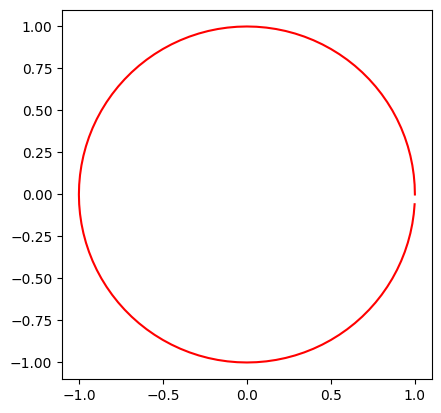

In [14]:
fig, ax = plt.subplots()

for i in range(res - hop):
    ax.plot([x[i], x[i+hop]], [y[i], y[i+hop]], c = 'k', lw = 1, alpha = 0.2)
    ax.plot([-x[i], -x[i+hop]], [-y[i], -y[i+hop]], c = 'k', lw = 1, alpha = 0.2)
ax.plot(x, y, c = 'r')
ax.set_aspect(1)
plt.show()

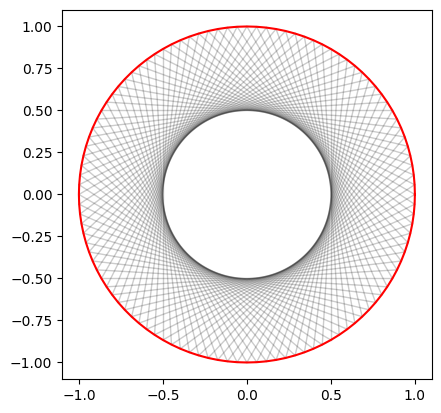

<function roll at 0x104dc0630>

In [31]:
fig, ax = plt.subplots()

for i in range(res):
    _x = np.roll(x, i)
    _y = np.roll(y, i)
    ax.plot([_x[0], _x[hop%res]], [_y[0], _y[hop%res]], c = 'k', lw = 1, alpha = 0.2)
# ax.plot(x, y, c = 'r')
# ax.plot(np.roll(x, 1)[:2], np.roll(y, 1)[:2], c = 'r')
ax.plot(np.concatenate((x, [x[0]])), np.concatenate((y, [y[0]])), c = 'r')
ax.set_aspect(1)
plt.show()
np.roll

In [16]:
len(x)

108

In [17]:
x[:4], np.roll(x[:4],1)

(array([1.        , 0.99830816, 0.99323836, 0.98480775]),
 array([0.98480775, 1.        , 0.99830816, 0.99323836]))

In [18]:
np.roll(x, 50)

array([-9.73044871e-01, -9.57989512e-01, -9.39692621e-01, -9.18216107e-01,
       -8.93632640e-01, -8.66025404e-01, -8.35487811e-01, -8.02123193e-01,
       -7.66044443e-01, -7.27373642e-01, -6.86241638e-01, -6.42787610e-01,
       -5.97158592e-01, -5.49508978e-01, -5.00000000e-01, -4.48799180e-01,
       -3.96079766e-01, -3.42020143e-01, -2.86803233e-01, -2.30615871e-01,
       -1.73648178e-01, -1.16092914e-01, -5.81448289e-02, -1.83697020e-16,
        5.81448289e-02,  1.16092914e-01,  1.73648178e-01,  2.30615871e-01,
        2.86803233e-01,  3.42020143e-01,  3.96079766e-01,  4.48799180e-01,
        5.00000000e-01,  5.49508978e-01,  5.97158592e-01,  6.42787610e-01,
        6.86241638e-01,  7.27373642e-01,  7.66044443e-01,  8.02123193e-01,
        8.35487811e-01,  8.66025404e-01,  8.93632640e-01,  9.18216107e-01,
        9.39692621e-01,  9.57989512e-01,  9.73044871e-01,  9.84807753e-01,
        9.93238358e-01,  9.98308158e-01,  1.00000000e+00,  9.98308158e-01,
        9.93238358e-01,  